<a href="https://colab.research.google.com/github/sayantanlahiri/Steel-Surface-Defects/blob/main/Steel_Surface_Defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting the google drive

from google.colab import drive        
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [85]:
#Importing the necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
main_path='/content/gdrive/MyDrive/Datasets/NEU Metal Surface Defects Data'
train_path='/content/gdrive/MyDrive/Datasets/NEU Metal Surface Defects Data/train'
valid_path='/content/gdrive/MyDrive/Datasets/NEU Metal Surface Defects Data/valid'
test_path='/content/gdrive/MyDrive/Datasets/NEU Metal Surface Defects Data/test'

In [ ]:
#os.listdir lists all the directories inside a folder path

print("Dataset directory: ",os.listdir(main_path))
print("Train directory: ",os.listdir(train_path))
print("Validation directory: ",os.listdir(valid_path))
print("Test directory: ",os.listdir(test_path))

Dataset directory:  ['Thumbs.db', 'valid', 'test', 'train']
Train directory:  ['Scratches', 'Patches', 'Pitted', 'Rolled', 'Inclusion', 'Crazing']
Validation directory:  ['Scratches', 'Rolled', 'Inclusion', 'Patches', 'Pitted', 'Crazing']
Test directory:  ['Scratches', 'Pitted', 'Inclusion', 'Crazing', 'Patches', 'Rolled']


In [ ]:
#Check the distribution of data and for the other defect the distribution is the same

print("Training inclusion data: ",len(os.listdir('/content/gdrive/MyDrive/Datasets/NEU Metal Surface Defects Data/train/Inclusion')))
print("Validation inclusion data:",len(os.listdir(valid_path+"/"+"Inclusion")))
print("Test inclusion data:",len(os.listdir(test_path+"/"+"Inclusion")))

Training inclusion data:  276
Validation inclusion data: 12
Test inclusion data: 12


In [67]:
#Data Augmentation

train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 zoom_range=0.2,
                                 shear_range=0.2)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(train_path,
                                                  target_size=(200,200),
                                                  batch_size=32,
                                                  class_mode='categorical')

valid_generator=test_datagen.flow_from_directory(valid_path,
                                                 target_size=(200,200),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

vgg16=VGG16(include_top=False,
            weights='imagenet',
            input_shape=(200,200,3),
            pooling='max,',
            classes=6)

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg16.trainable=False

vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation

model=Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 24,155,462
Trainable params: 9,440,774
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
class my_CallBack(tf.keras.callbacks.Callback):

  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.98:
      print("Reached 98% accuracy")
      self.model.stop_training=True

In [ ]:
initial_epochs=10
loss0,accuracy0=model.evaluate(valid_generator)

print("The initial loss is: {:.2f}".format(loss0))
print("The initial accuaracy is: {:.2f}".format(accuracy0))

3/3 [==============================] - 42s 3s/step - loss: 1.9449 - accuracy: 0.1944
The initial loss is: 1.94
The initial accuaracy is: 0.19


In [70]:
callback=my_CallBack()
history=model.fit(train_generator,
                  batch_size=32,
                  epochs=initial_epochs,
                  validation_data=valid_generator,
                  verbose=1,
                  shuffle=True,
                  callbacks=[callback])

Epoch 1/10
52/52 [==============================] - 1184s 23s/step - loss: 0.9994 - accuracy: 0.7651 - val_loss: 0.1020 - val_accuracy: 0.9861
Epoch 2/10
52/52 [==============================] - 21s 401ms/step - loss: 0.1540 - accuracy: 0.9481 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 3/10
52/52 [==============================] - 21s 405ms/step - loss: 0.1275 - accuracy: 0.9595 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 4/10
52/52 [==============================] - 21s 410ms/step - loss: 0.1187 - accuracy: 0.9583 - val_loss: 0.0222 - val_accuracy: 0.9861
Epoch 5/10
52/52 [==============================] - 21s 406ms/step - loss: 0.1112 - accuracy: 0.9620 - val_loss: 0.0642 - val_accuracy: 0.9861
Epoch 6/10
52/52 [==============================] - 21s 410ms/step - loss: 0.0796 - accuracy: 0.9668 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 7/10
52/52 [==============================] - 21s 408ms/step - loss: 0.0985 - accuracy: 0.9626 - val_loss: 0.0050 - val_accuracy: 1.0000

In [72]:
def load_dataset(path):
  data=load_files(path)
  files=np.array(data['filenames'])
  target=np.array(data['target'])
  target_labels=np.array(data['target_names'])
  return data,files,target_labels

In [73]:
x_test,y_test,target_labels=load_dataset(test_path)

In [74]:
no_of_classes=len(np.unique(y_test))
no_of_classes

72

In [75]:
def convert_image_to_array(files):
  img_as_array=[]
  for file in files:
    img_as_array.append(img_to_array(load_img(file)))
  return img_as_array

In [76]:
target_labels

array(['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'],
      dtype='<U9')

In [77]:
x_test = np.array(convert_image_to_array(x_test['filenames']))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [78]:
x_test = x_test.astype('float32')/255

In [79]:
y_pred=model.predict(x_test)

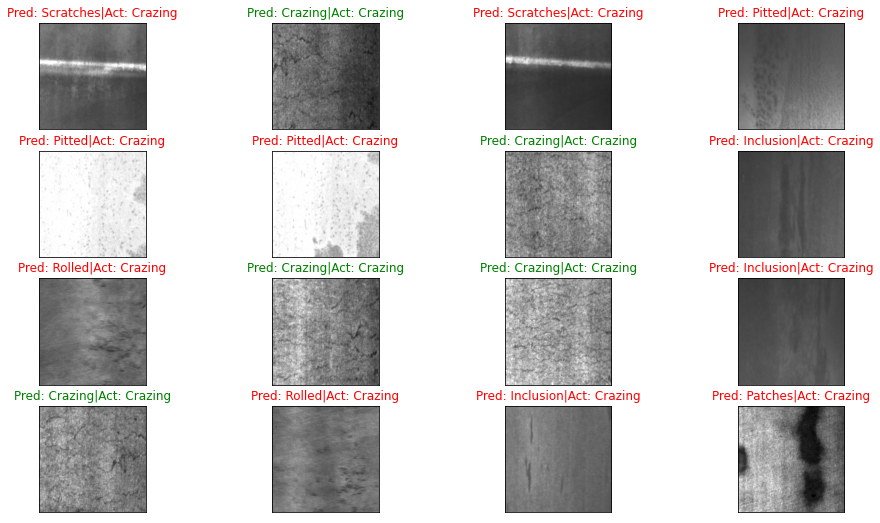

In [93]:
fig=plt.figure(figsize=(16,9))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("Pred: {}|Act: {}".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [55]:
from tensorflow.keras.applications import ResNet50

In [59]:
resnet=ResNet50(include_top=False,
                weights='imagenet',
                input_shape=(200,200,3),
                pooling='max',
                classes=6)

94773248/94765736 [==============================] - 1s 0us/step


In [60]:
resnet.trainable=False

In [61]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [63]:
resnet_model=Sequential()

resnet_model.add(resnet)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(6,activation='softmax'))

In [64]:
resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [65]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [68]:
initial_epochs = 10
loss0, accuracy0 = resnet_model.evaluate(valid_generator)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

3/3 [==============================] - 4s 406ms/step - loss: 7.5398 - accuracy: 0.1667
initial loss: 7.54
initial accuracy: 0.17


In [81]:
callbacks = my_CallBack()
history1 = resnet_model.fit(train_generator, epochs=50,
                    validation_data=valid_generator, callbacks=[callbacks],
                    verbose=1, shuffle=True)

Epoch 1/50
52/52 [==============================] - 21s 404ms/step - loss: 1.1309 - accuracy: 0.5483 - val_loss: 1.0045 - val_accuracy: 0.6667
Epoch 2/50
52/52 [==============================] - 21s 402ms/step - loss: 1.0648 - accuracy: 0.5930 - val_loss: 0.9322 - val_accuracy: 0.5972
Epoch 3/50
52/52 [==============================] - 21s 405ms/step - loss: 0.9260 - accuracy: 0.6793 - val_loss: 0.8029 - val_accuracy: 0.6250
Epoch 4/50
52/52 [==============================] - 21s 409ms/step - loss: 0.9456 - accuracy: 0.6570 - val_loss: 0.8885 - val_accuracy: 0.7639
Epoch 5/50
52/52 [==============================] - 21s 410ms/step - loss: 0.9490 - accuracy: 0.6455 - val_loss: 0.7985 - val_accuracy: 0.7083
Epoch 6/50
52/52 [==============================] - 22s 425ms/step - loss: 0.8719 - accuracy: 0.6866 - val_loss: 0.6458 - val_accuracy: 0.8056
Epoch 7/50
52/52 [==============================] - 22s 412ms/step - loss: 0.8465 - accuracy: 0.7065 - val_loss: 0.8195 - val_accuracy: 0.6806

In [94]:
y_pred1=resnet_model.predict(x_test)

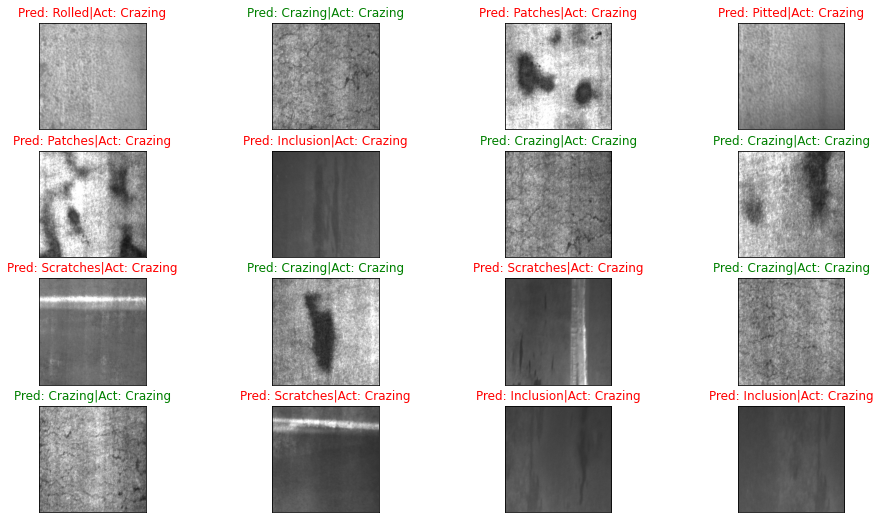

In [96]:
fig=plt.figure(figsize=(16,9))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred1[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("Pred: {}|Act: {}".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [92]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
from tensorflow.python.keras.layers import Input, Dense
from keras.layers.normalization import BatchNormalization

alex_model=Sequential()

alex_model.add(Conv2D(filters=96,kernel_size=(11,11),input_shape=(200,200,3),strides=(4,4),activation='relu',padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))

alex_model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))

alex_model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))

alex_model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same'))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
alex_model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'))

#Passing it to a Fully Connected layer
alex_model.add(Flatten())
# 1st Fully Connected Layer
alex_model.add(Dense(4096))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
# Add Dropout to prevent overfitting
alex_model.add(Dropout(0.5))

#2nd Fully Connected Layer
alex_model.add(Dense(4096))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
#Add Dropout
alex_model.add(Dropout(0.5))

#3rd Fully Connected Layer
alex_model.add(Dense(1000))
alex_model.add(BatchNormalization())
alex_model.add(Activation('relu'))
#Add Dropout
alex_model.add(Dropout(0.4))

#Output Layer
alex_model.add(Dense(6))
alex_model.add(BatchNormalization())
alex_model.add(Activation('softmax'))


alex_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 96)        34944     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 50, 50, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 256)       614656    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 25, 25, 256)       1024      
_________________________________________________________________
activation_2 (Activation)    (None, 25, 25, 256)      

In [97]:
y_pred2=alex_model.predict(x_test)

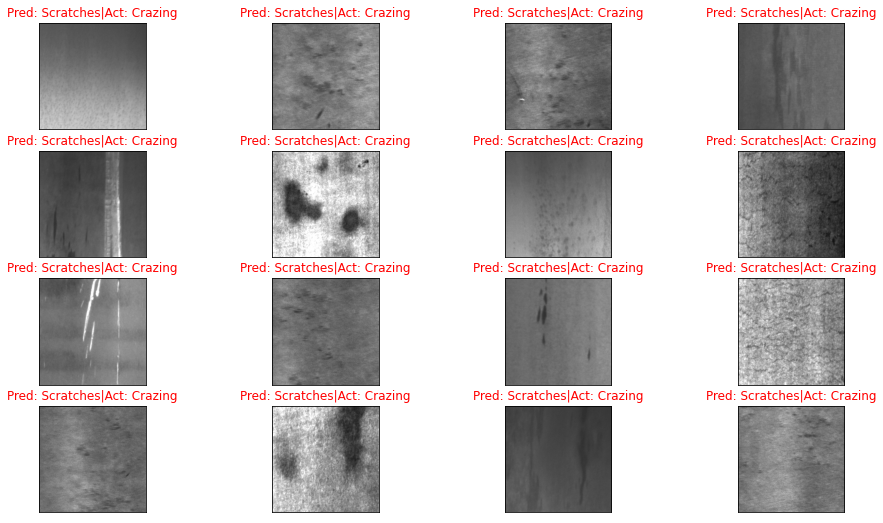

In [105]:
fig=plt.figure(figsize=(16,9))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred2[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("Pred: {}|Act: {}".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))